In [6]:
import pandas as pd
import numpy as np
dt = pd.read_csv('q2080_2016_005.csv')

In [7]:
OUTS = ['(O1) Mean queue length of an EV station [n]',
       '(O2) Mean waiting time in queue at an EV station [hours]',
       '(O3) Mean service time to charge at an EV station [hours]',
       '(O4) Total time spent overall at an EV station [hours]',
       '(O5) Total energy consumption of an EV station [kWh]',
       '(O6) Maximum recorded queue length of an EV station [n]',
       '(O7) Maximum waiting time in queue at an EV station [hours]',
       '(O8) Maximum time spent overall at an EV station [hours]',
       '(O9) Maximal energy consumption of an EV station [kW]']

In [8]:
from sklearn.preprocessing import LabelEncoder as LE
rem = dt[((dt[OUTS[1]])==0) & (dt[OUTS[0]]>0)]
dt=dt.drop(rem.index,axis=0)


def filt(text):
    import itertools
    # Use characters of control category
    nonprintable = itertools.chain(range(0x00,0x20),range(0x7f,0xa0))
    # Use translate to remove all non-printable characters
    return text.translate({character:None for character in nonprintable}).replace('/',' ')

C:\Users\User\AppData\Local\Temp/ipykernel_11432/523038761.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,9))


<Figure size 864x504 with 0 Axes>

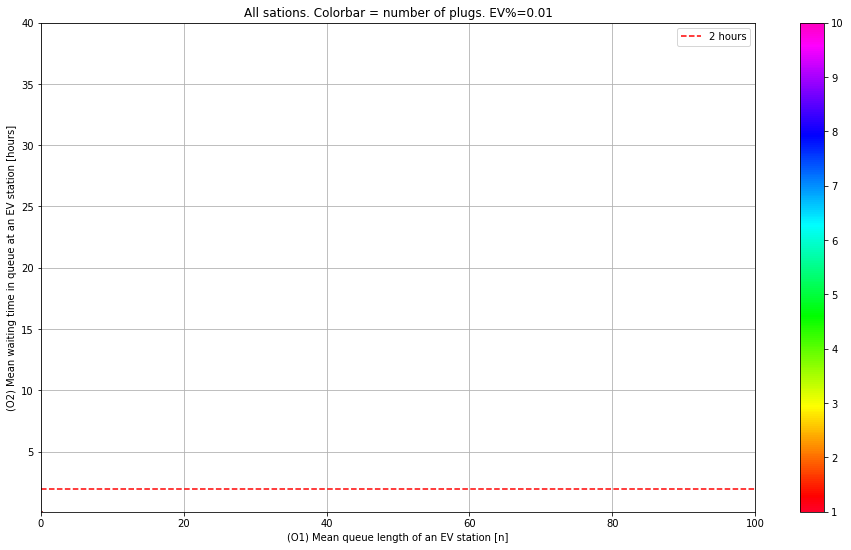

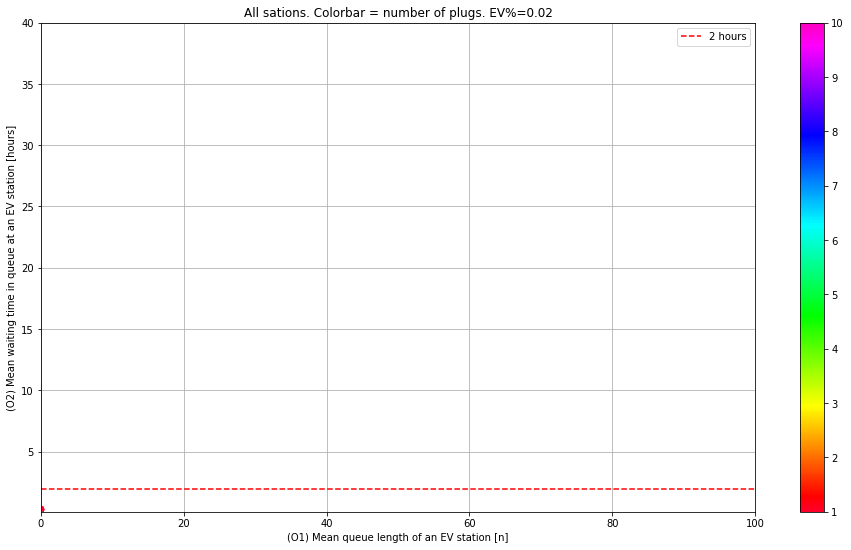

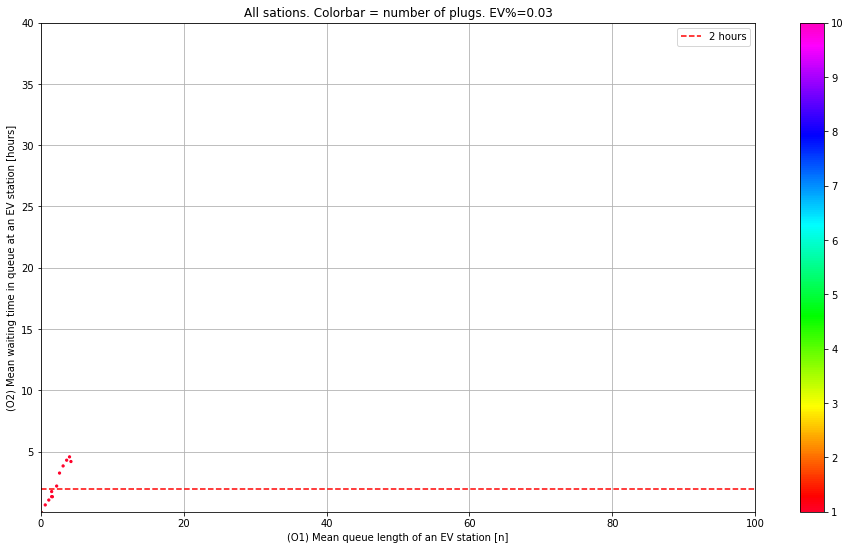

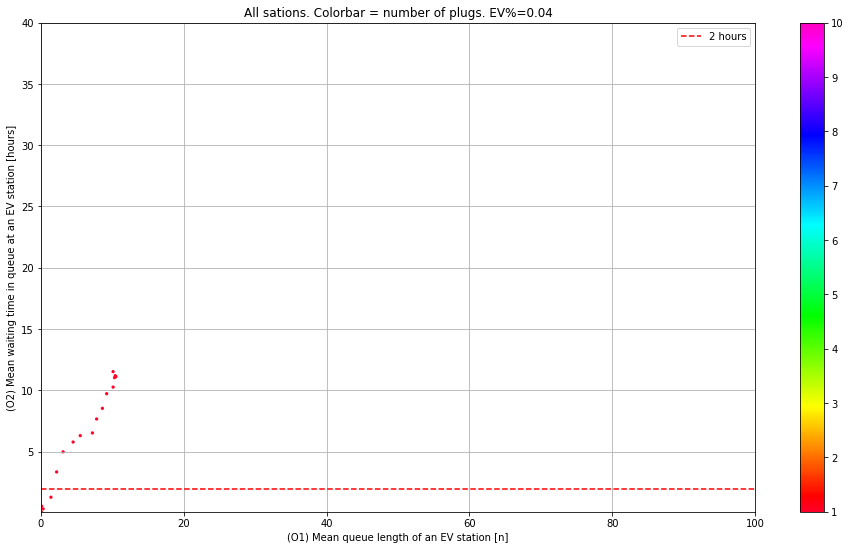

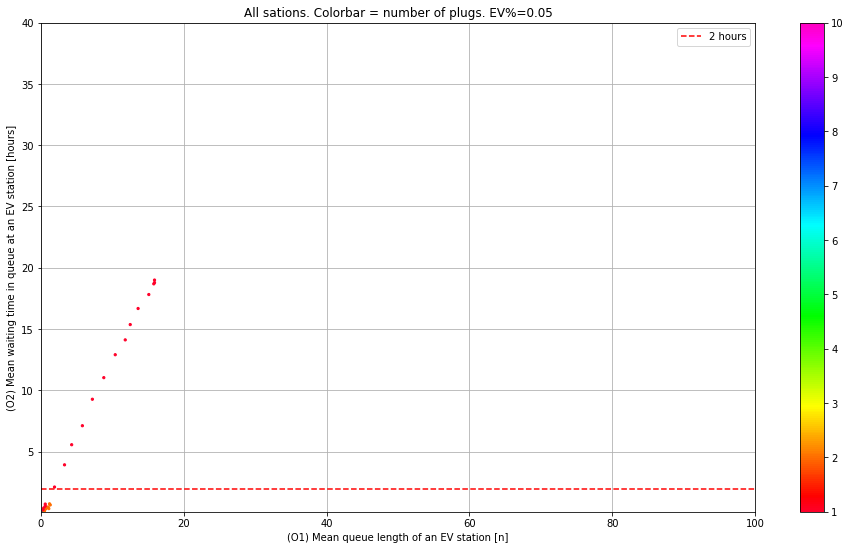

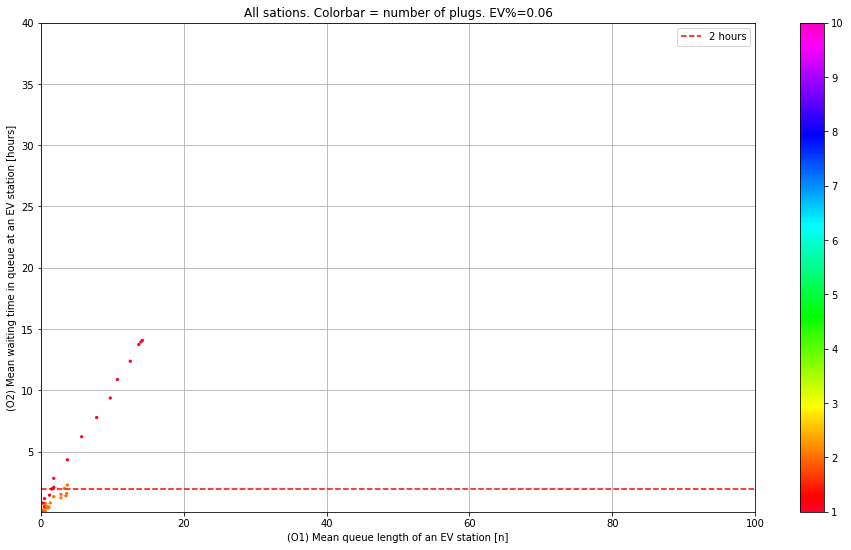

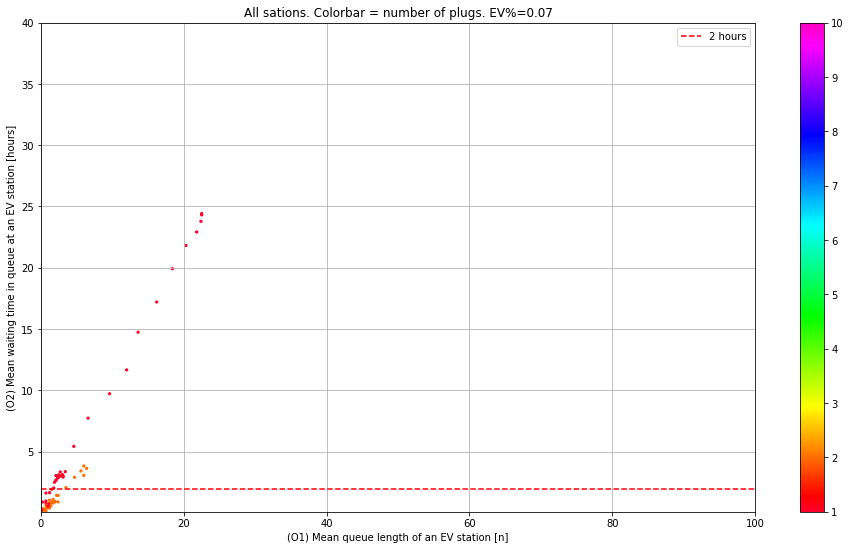

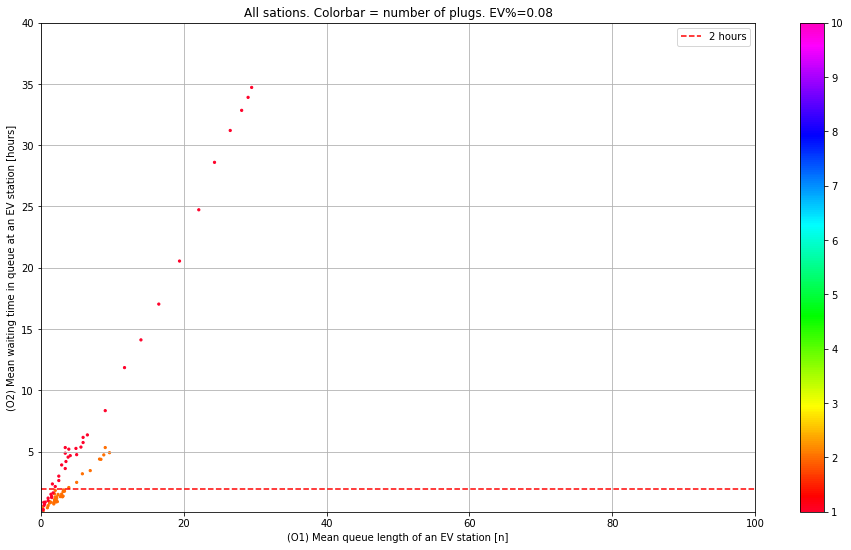

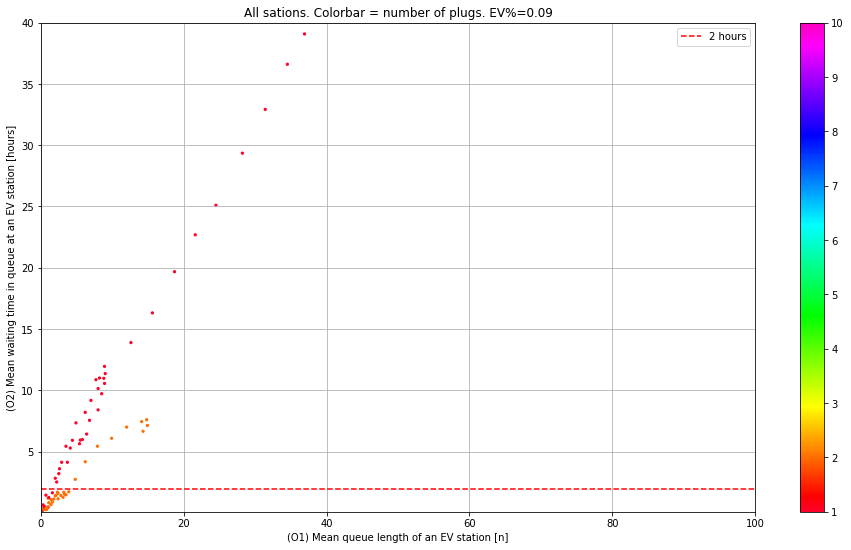

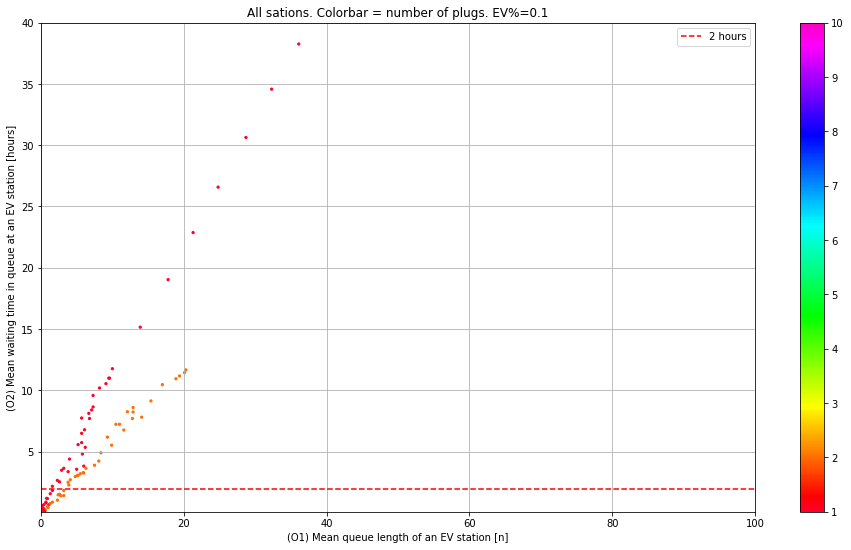

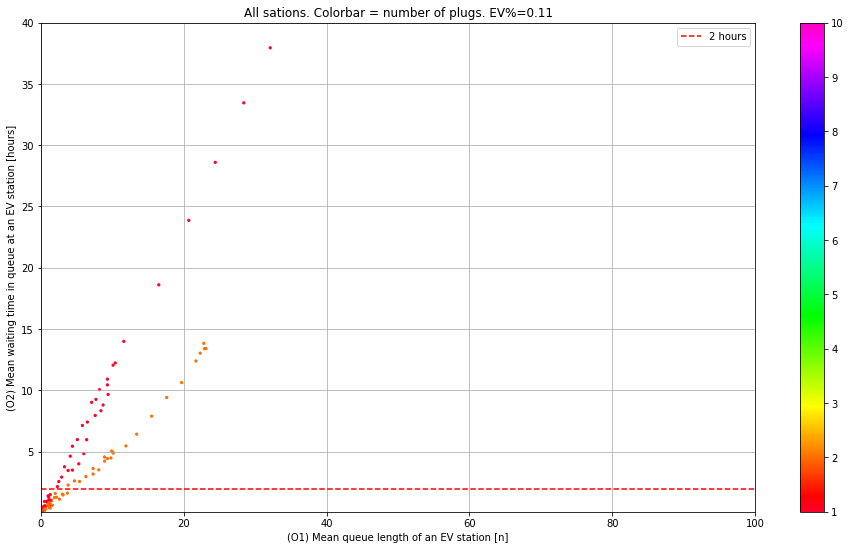

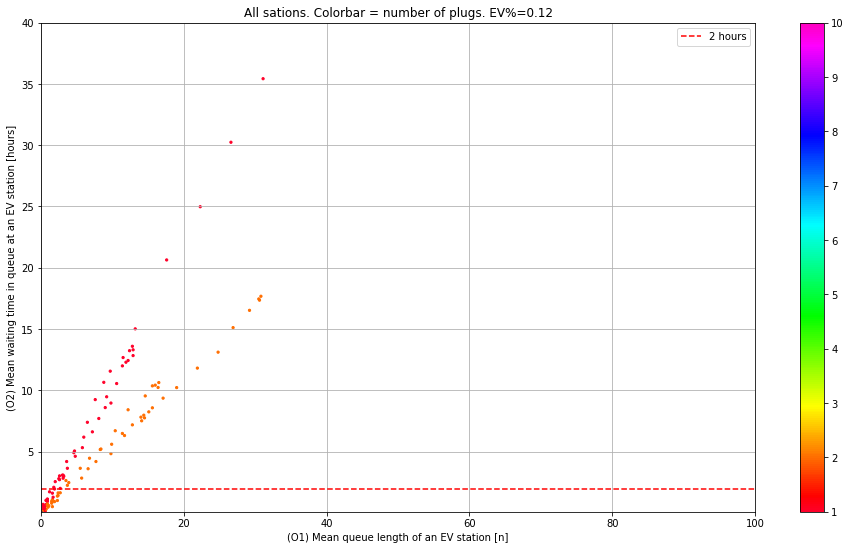

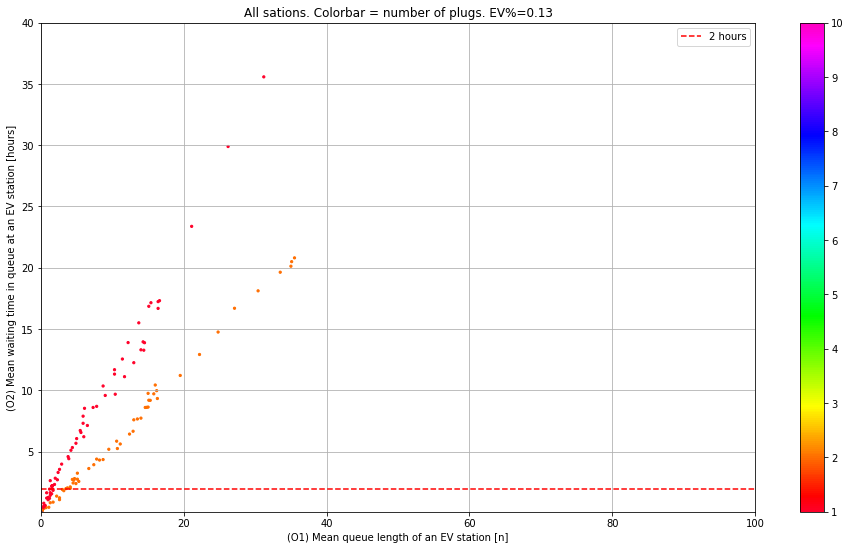

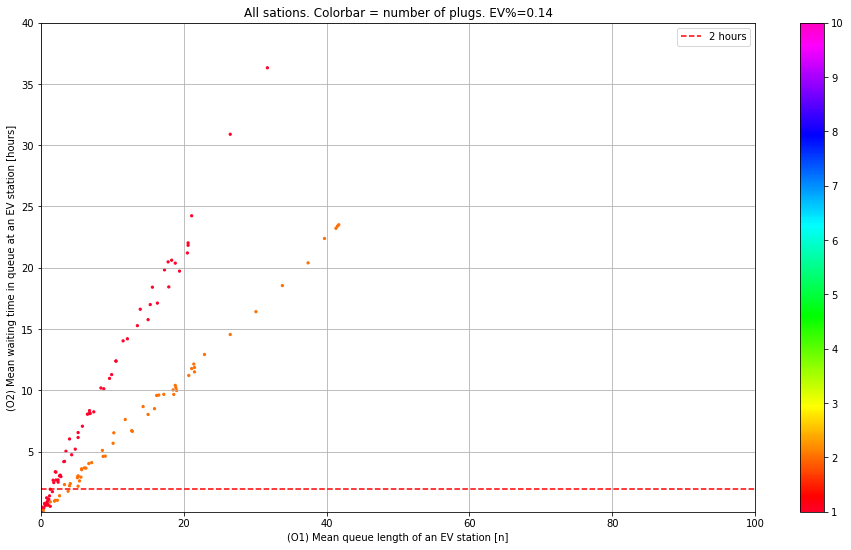

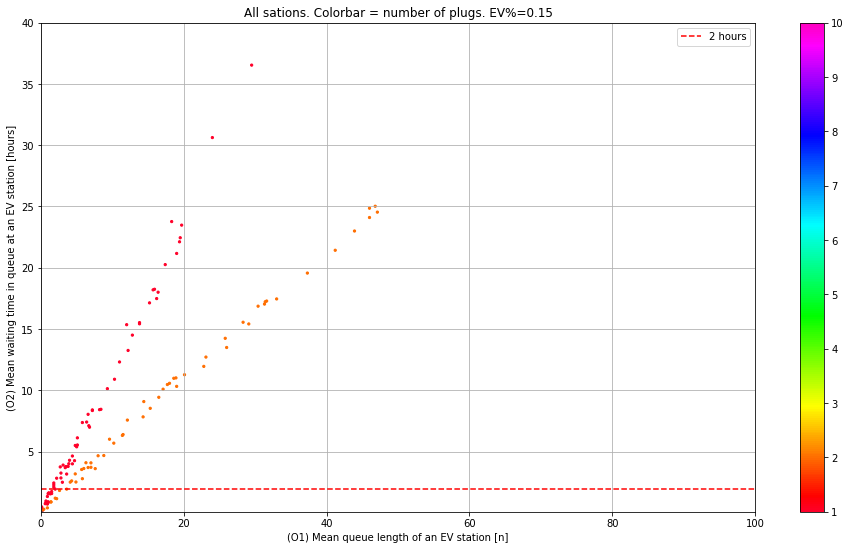

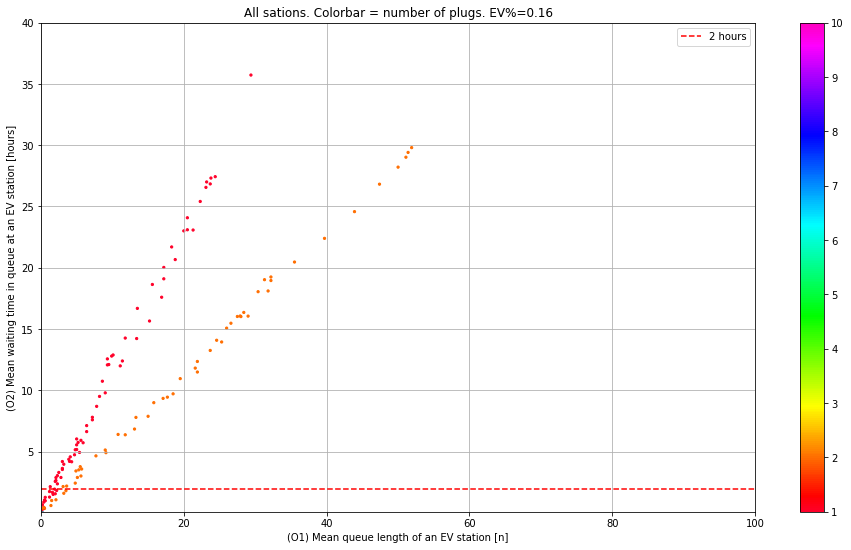

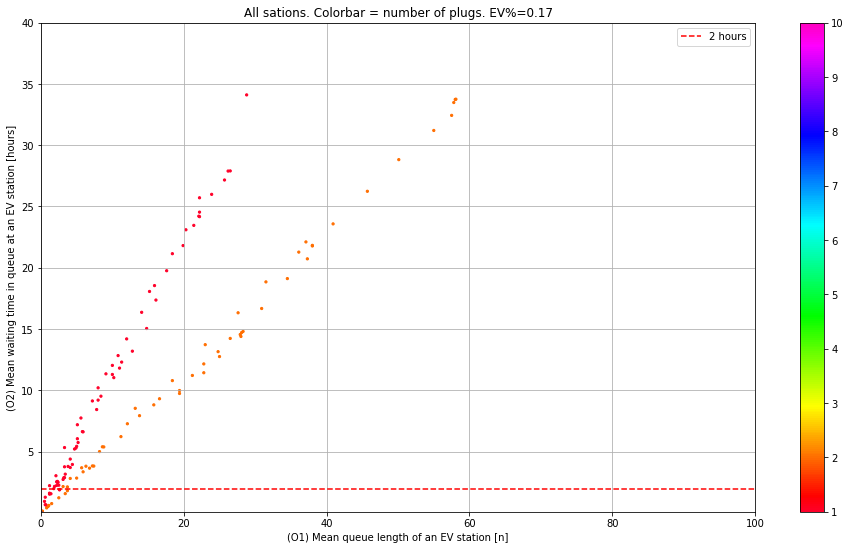

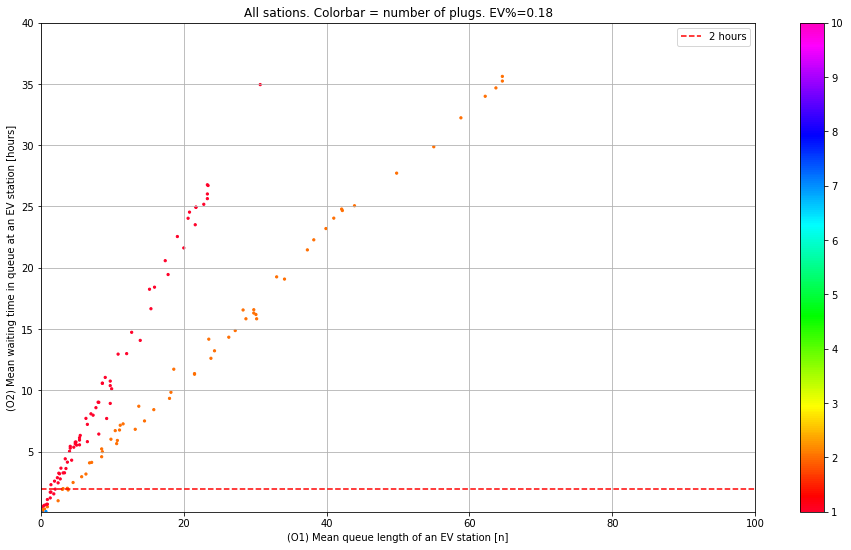

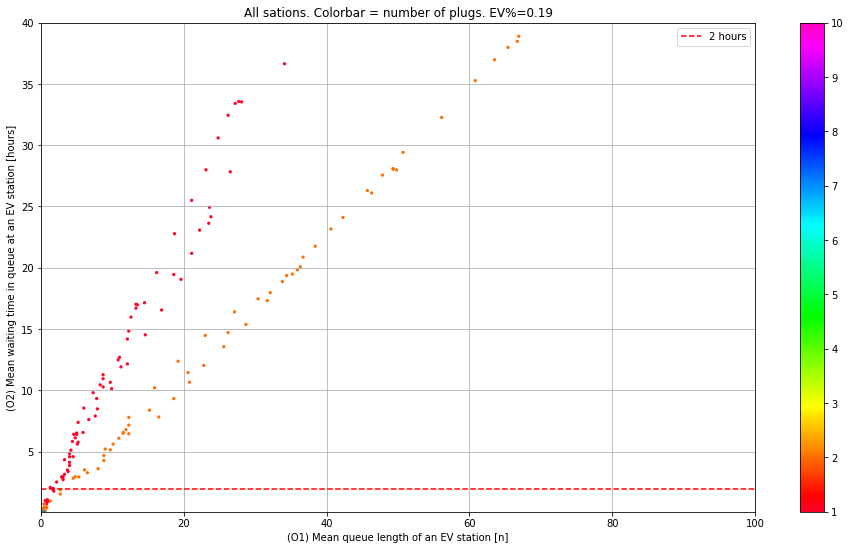

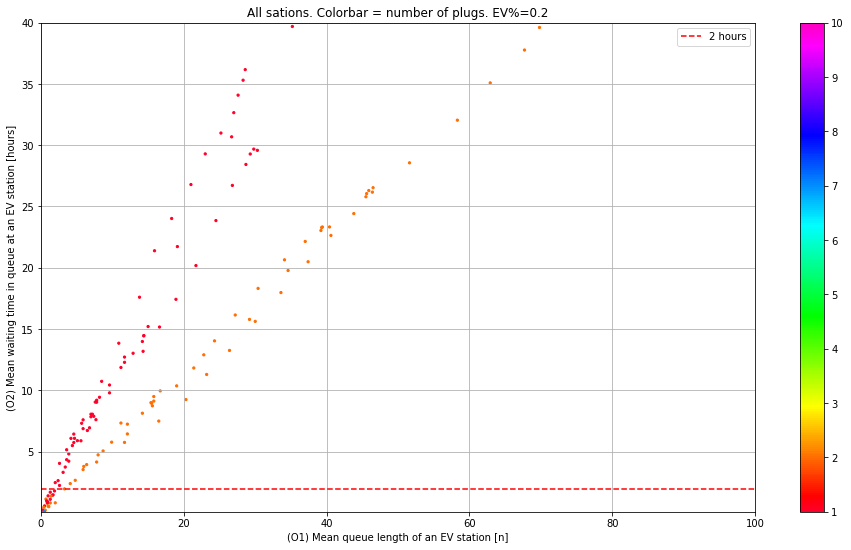

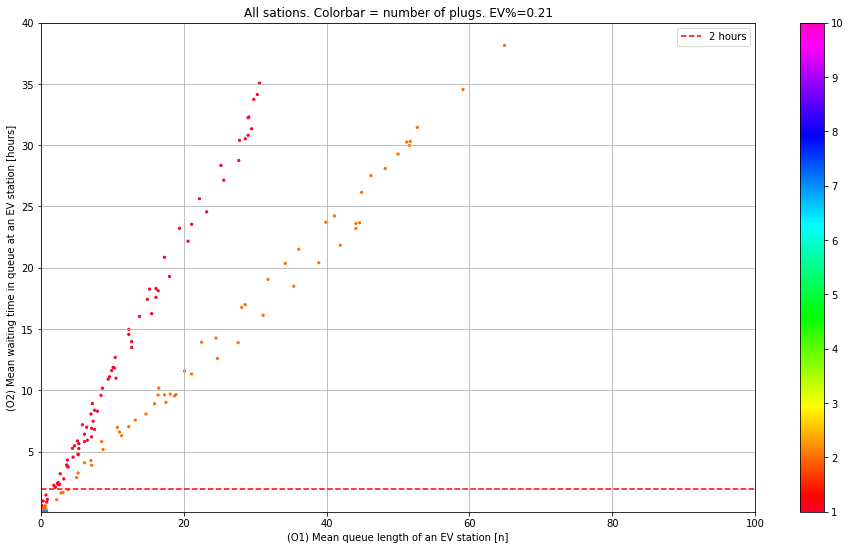

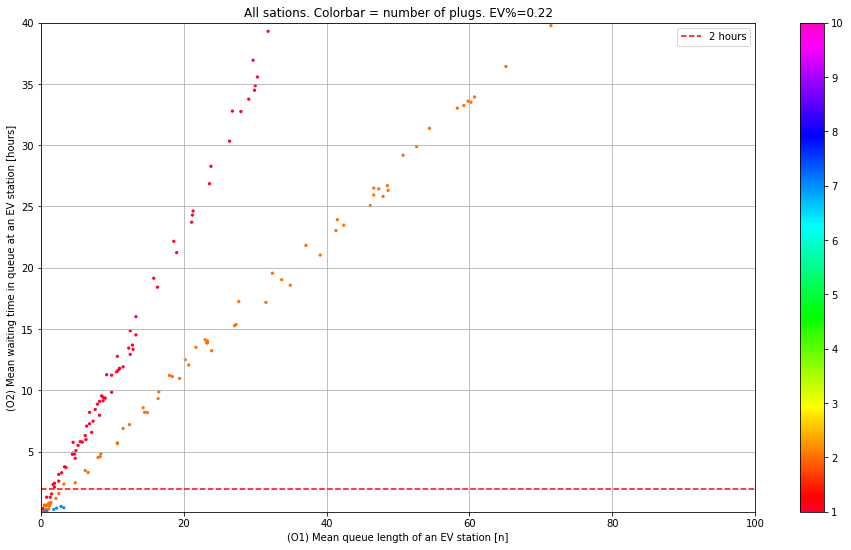

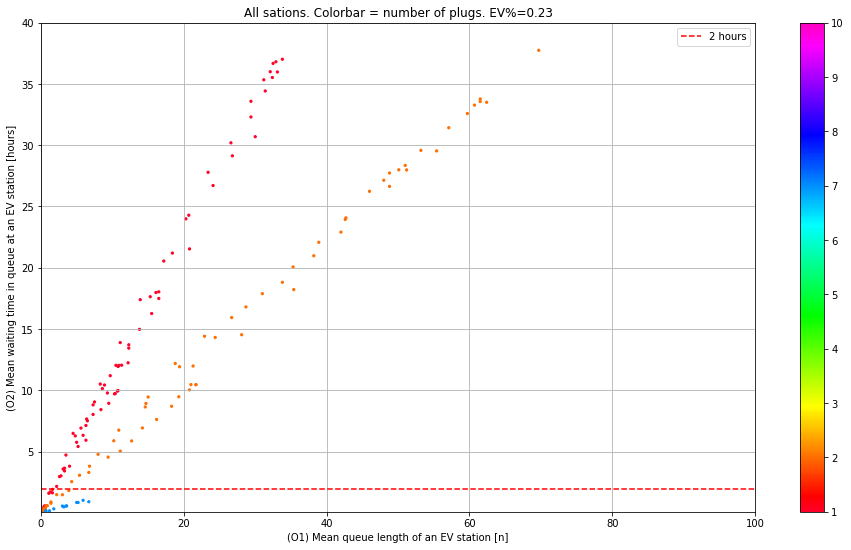

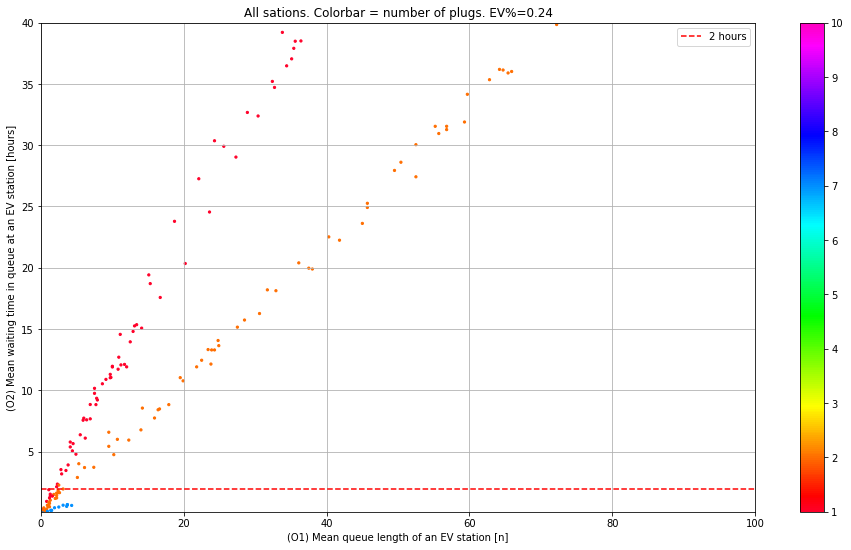

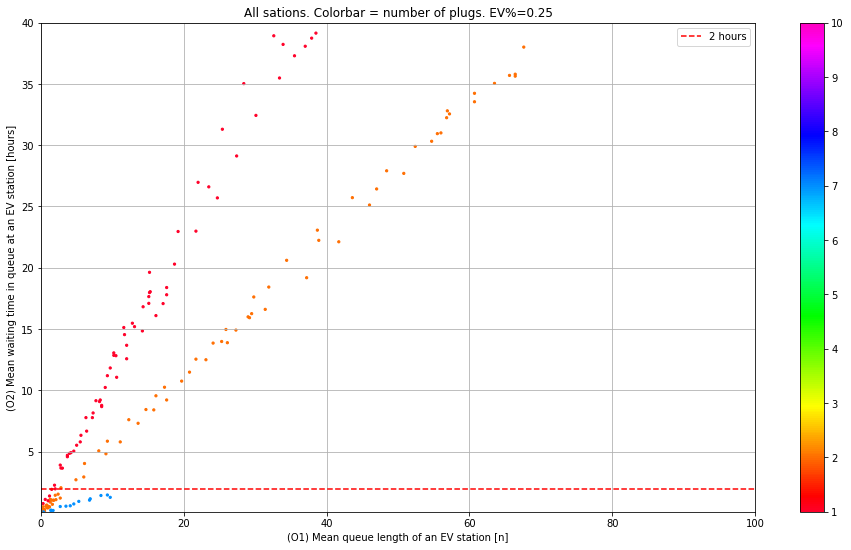

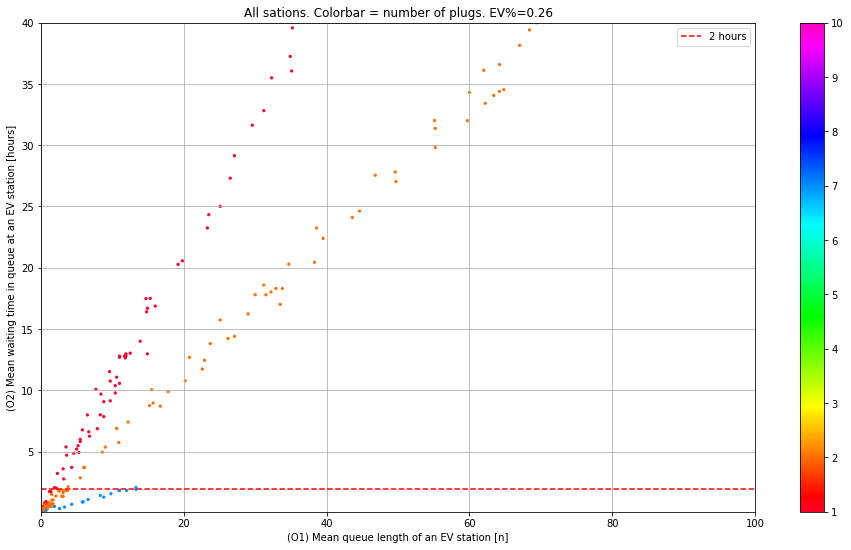

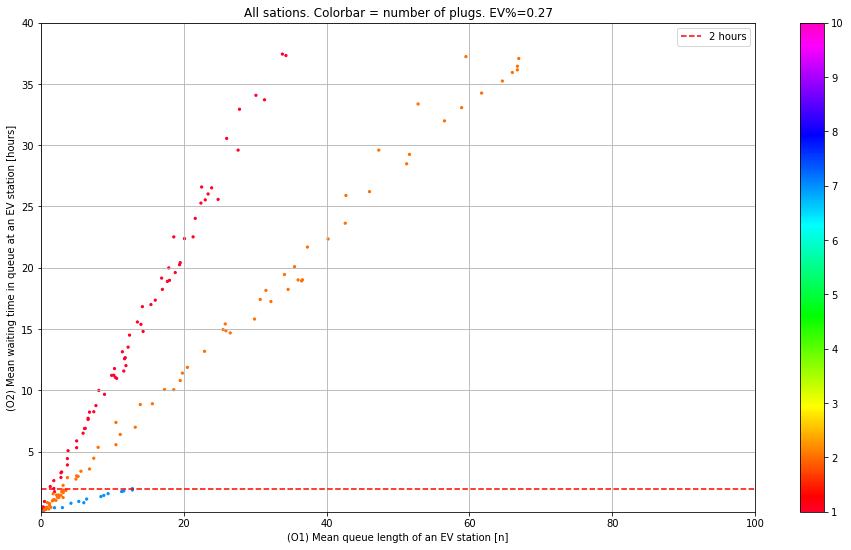

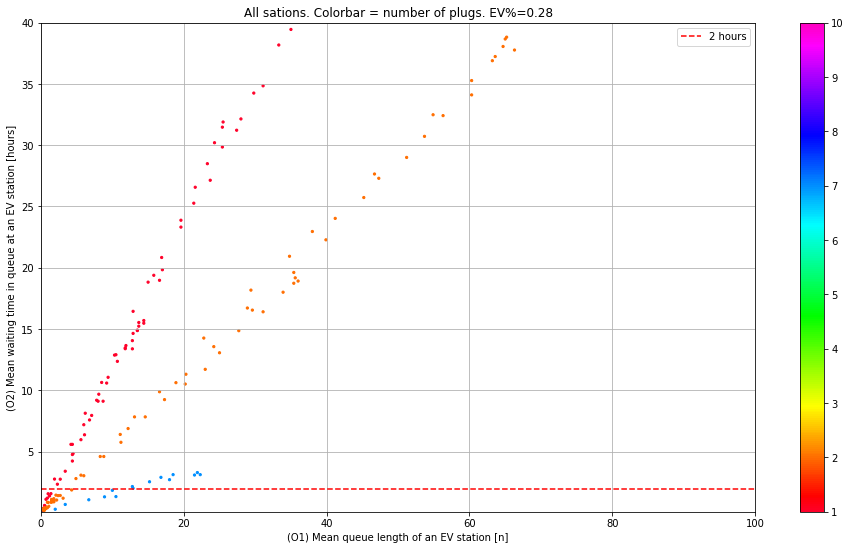

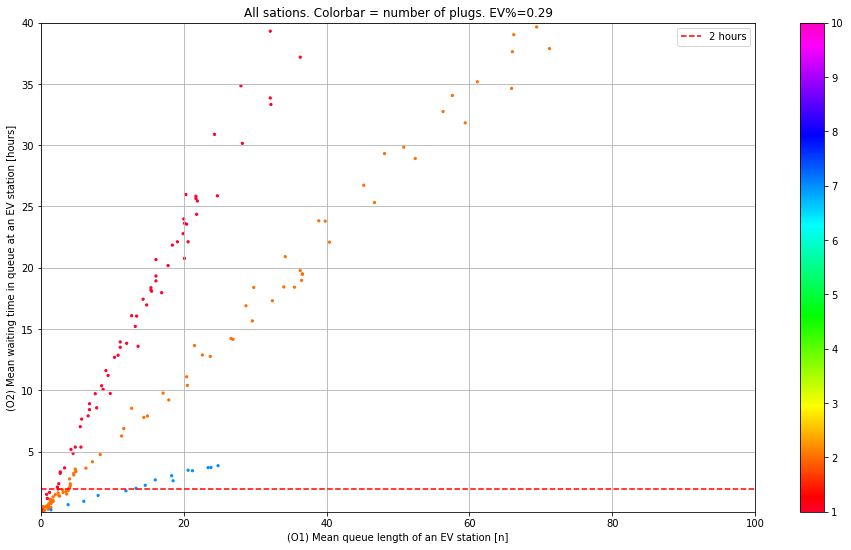

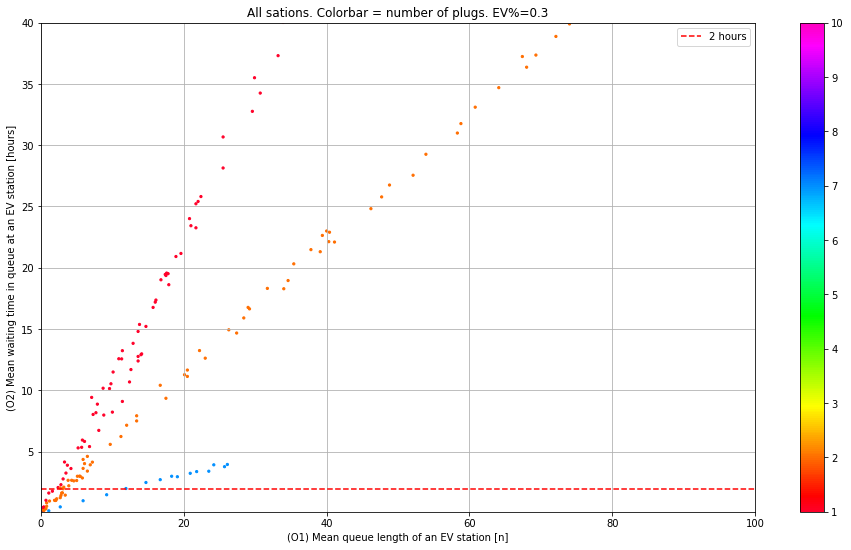

In [9]:
idx=0
import string
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))

for P in dt['Percentage of vehicles passing station that will charge their vehicle'].unique(): 
    plt.figure(figsize=(16,9))
    xt = dt[dt['Percentage of vehicles passing station that will charge their vehicle']==P]
    X = xt[OUTS[0]]
    Y = xt[OUTS[1]]
    
    le = LE()

    plt.scatter(X,Y,s=5,c=xt['Number of plugs'],cmap='gist_rainbow')

    plt.colorbar()
    plt.ylim(0,max(dt[OUTS[1]]))
    plt.xlim(0,100)
    plt.xlabel(OUTS[0])
    plt.ylabel(OUTS[1])
    plt.grid()
    plt.axhline(y=2, color='r', linestyle='--',label='2 hours')
    plt.legend()
    plt.ylim(0.1,40)
    plt.title('All sations. Colorbar = number of plugs. EV%='+str(np.round(P,2)))
    plt.savefig('EV-{}'.format(str(idx).zfill(3))+'.png',format='png',bbox_inches='tight',pad_inches = 0)
#     break
    idx+=1
    